In [13]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

df = pd.read_csv("output.csv")
df = df[(df['Zonal'] != -1.E+34) & (df['Meridional'] != -1.E+34)]

# Assuming df is your pandas DataFrame
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
crs = {'init': 'epsg:4326'}  # Coordinate Reference System, adjust if needed

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

# Random sampling to reduce the number of points
sampled_gdf = gdf.sample(frac=0.008)  # Adjust the fraction as needed


/home/harsh/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


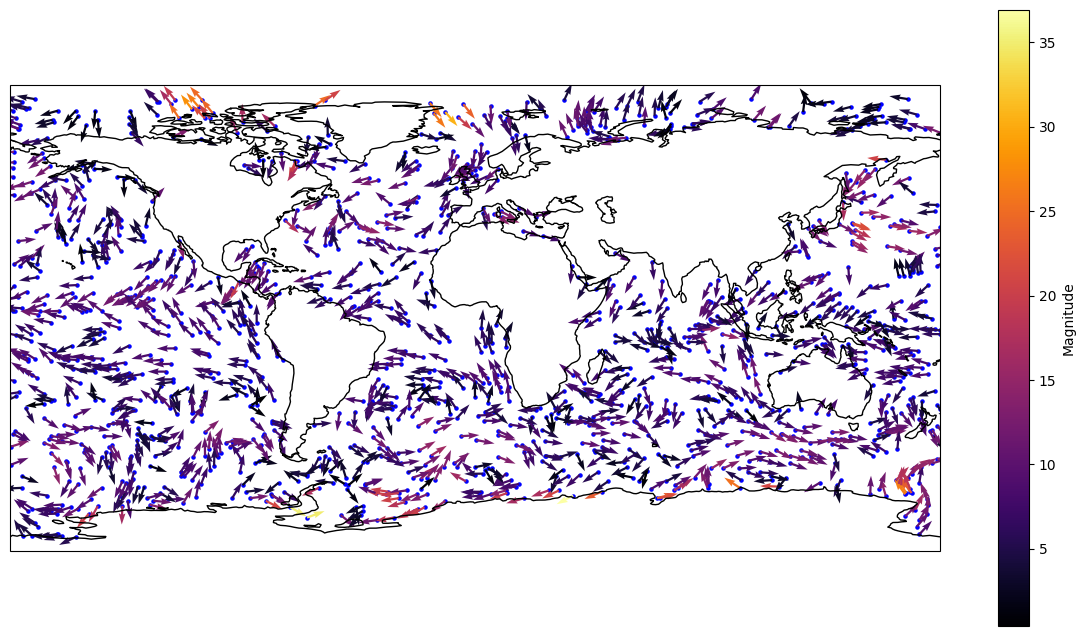

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

# Calculate arrow directions using zonal and meridional components
u = sampled_gdf['Zonal']
v = sampled_gdf['Meridional']

# Calculate the color based on the arrow values
color = np.sqrt(u**2 + v**2)

# Making arrows lengths equal
arrow_lengths = np.sqrt(sampled_gdf['Zonal'] ** 2 + sampled_gdf['Meridional'] ** 2)
u = u / arrow_lengths
v = v / arrow_lengths

# Uniformly increase the arrow size
# scale_factor = 0.1  # Change this factor as needed
# u *= scale_factor
# v *= scale_factor

# Create the plot with a map background
fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

sampled_gdf.plot(ax=ax, transform=ccrs.PlateCarree(), color='blue', marker='o', markersize=5)
quiver = ax.quiver(sampled_gdf['Longitude'], sampled_gdf['Latitude'], u, v, color, transform=ccrs.PlateCarree(), scale=50, cmap='inferno')
ax.coastlines()

# Adding a color bar
cbar = plt.colorbar(quiver, ax=ax)
cbar.set_label('Magnitude')

plt.show()
